<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

#  <font style='color:skyblue'> PROJECT TITLE: APPLIANCE ENERGY PREDICTIONS 

---

## <font style='color:skyblue'>  Table of Contents  
- [Abstract](#section-1)
- [Problem Statement](#section-2)
- [Data Set](#section-3)
- [Importing the Relevant Libraries](#section-4)
- [Data Exploration](#section-5)
- [Data Visualization](#section-6)
- [Feature Selection](#section-7)
- [Feature Engineering](#section-8)



 ---

## <font style='color:skyblue'>  Abstract <a id='section-1'></a> 


Energy consumption is rapidly increasing globally, leading to energy scarcity and environmental damage. This project aims to analyze the factors influencing the rising energy consumption of home appliances, explore methods to reduce this consumption, and predict energy usage using regression models. The challenge involves supervised machine learning to predict appliance energy usage based on factors like temperature, humidity, and pressure. Various algorithms, including linear regression, have been employed for energy consumption prediction.


---

## <font style='color:skyblue'>  Problem Statement <a id='section-2'></a>
The dataset consists of 10-minute intervals spanning around 4.5 months. It encompasses temperature and humidity readings from a ZigBee wireless sensor network within the house, along with energy consumption data recorded every 10 minutes through m-bus energy meters. Additionally, weather information sourced from Chievres Airport, Belgium, via Reliable Prognosis, has been integrated into the dataset.


---

##  <font style='color:skyblue'> Data Set <a id='section-3'></a>


<div style="display: flex;">

<div style="flex: 50%; padding-right: 10px;">

| Feature       | Description                           |
|:--------------|:--------------------------------------|
| lights        | Energy use of light fixtures          |
| T1            | Temperature in kitchen area            |
| RH_1          | Humidity in kitchen area               |
| T2            | Temperature in living room area        |
| RH_2          | Humidity in living room area           |
| T3            | Temperature in laundry room area       |
| RH_3          | Humidity in laundry room area          |
| T4            | Temperature in office room             |
| RH_4          | Humidity in office room                |
| T5            | Temperature in bathroom                |
| RH_5          | Humidity in bathroom                   |
| T6            | Temperature outside the building       |
| RH_6          | Humidity outside the building          |
| T7            | Temperature in ironing room            |
| RH_7          | Humidity in ironing room               |

</div>

<div style="flex: 50%; padding-left: 10px;">

| Feature       | Description                           |
|:--------------|:--------------------------------------|
| T8            | Temperature in teenager room 2         |
| RH_8          | Humidity in teenager room 2            |
| T9            | Temperature in parents’ room           |
| RH_9          | Humidity in parents room               |
| T_out         | Temperature outside (from Chievres weather station) |
| Press_mm_hg   | Pressure (from Chievres weather station) |
| RH_out        | Humidity outside (from Chievres weather station) |
| Windspeed     | Wind speed (from Chievres weather station) |
| Visibility    | Visibility (from Chievres weather station)    |
| Tdewpoint     | Tdewpoint (from Chievres weather station)      |
| rv1           | Random variable 1                     |
| rv2           | Random variable 2                     |
| Date          | Date and time format                   |
| Appliances    | Energy used by appliances (Target Feature)      |

</div>

</div>

---

## <font style='color:skyblue'>  1. Importing  Libraries  <a id='section-4'></a>

In [10]:
# Setting up the necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from math import sqrt
from IPython.display import display, Image
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics



In [11]:
# Reading the CSV file 
data = pd.read_csv("appliance.csv")
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


## <font style='color:skyblue'>  2. Data Exploration  <a id='section54'></a>

---

In [14]:
# Shape to get the number of rows and columns
data.shape

(19735, 29)

In [15]:
# Column names 
data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [16]:
# Summary information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [17]:
# Desscriptive statistics 
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


#### <font style='color:skyblue'>  Data Exploration Observation 

- The dataset consists of 19,735 rows and 29 columns.
- All data types in the dataset are numeric, except for the date column.
-  Unnecessary columns, such as 'lights,' could be removed as they do not contribute to our analysis.
- We observed that the appliance energy consumption ranges from 10 watts to 1080 watts.
- According to the previous findings, our dataset is free from null or missing values, which could otherwise affect our accuracy

---

##  <font style='color:skyblue'>  3.  Data Visualization <a id='section-6'></a>


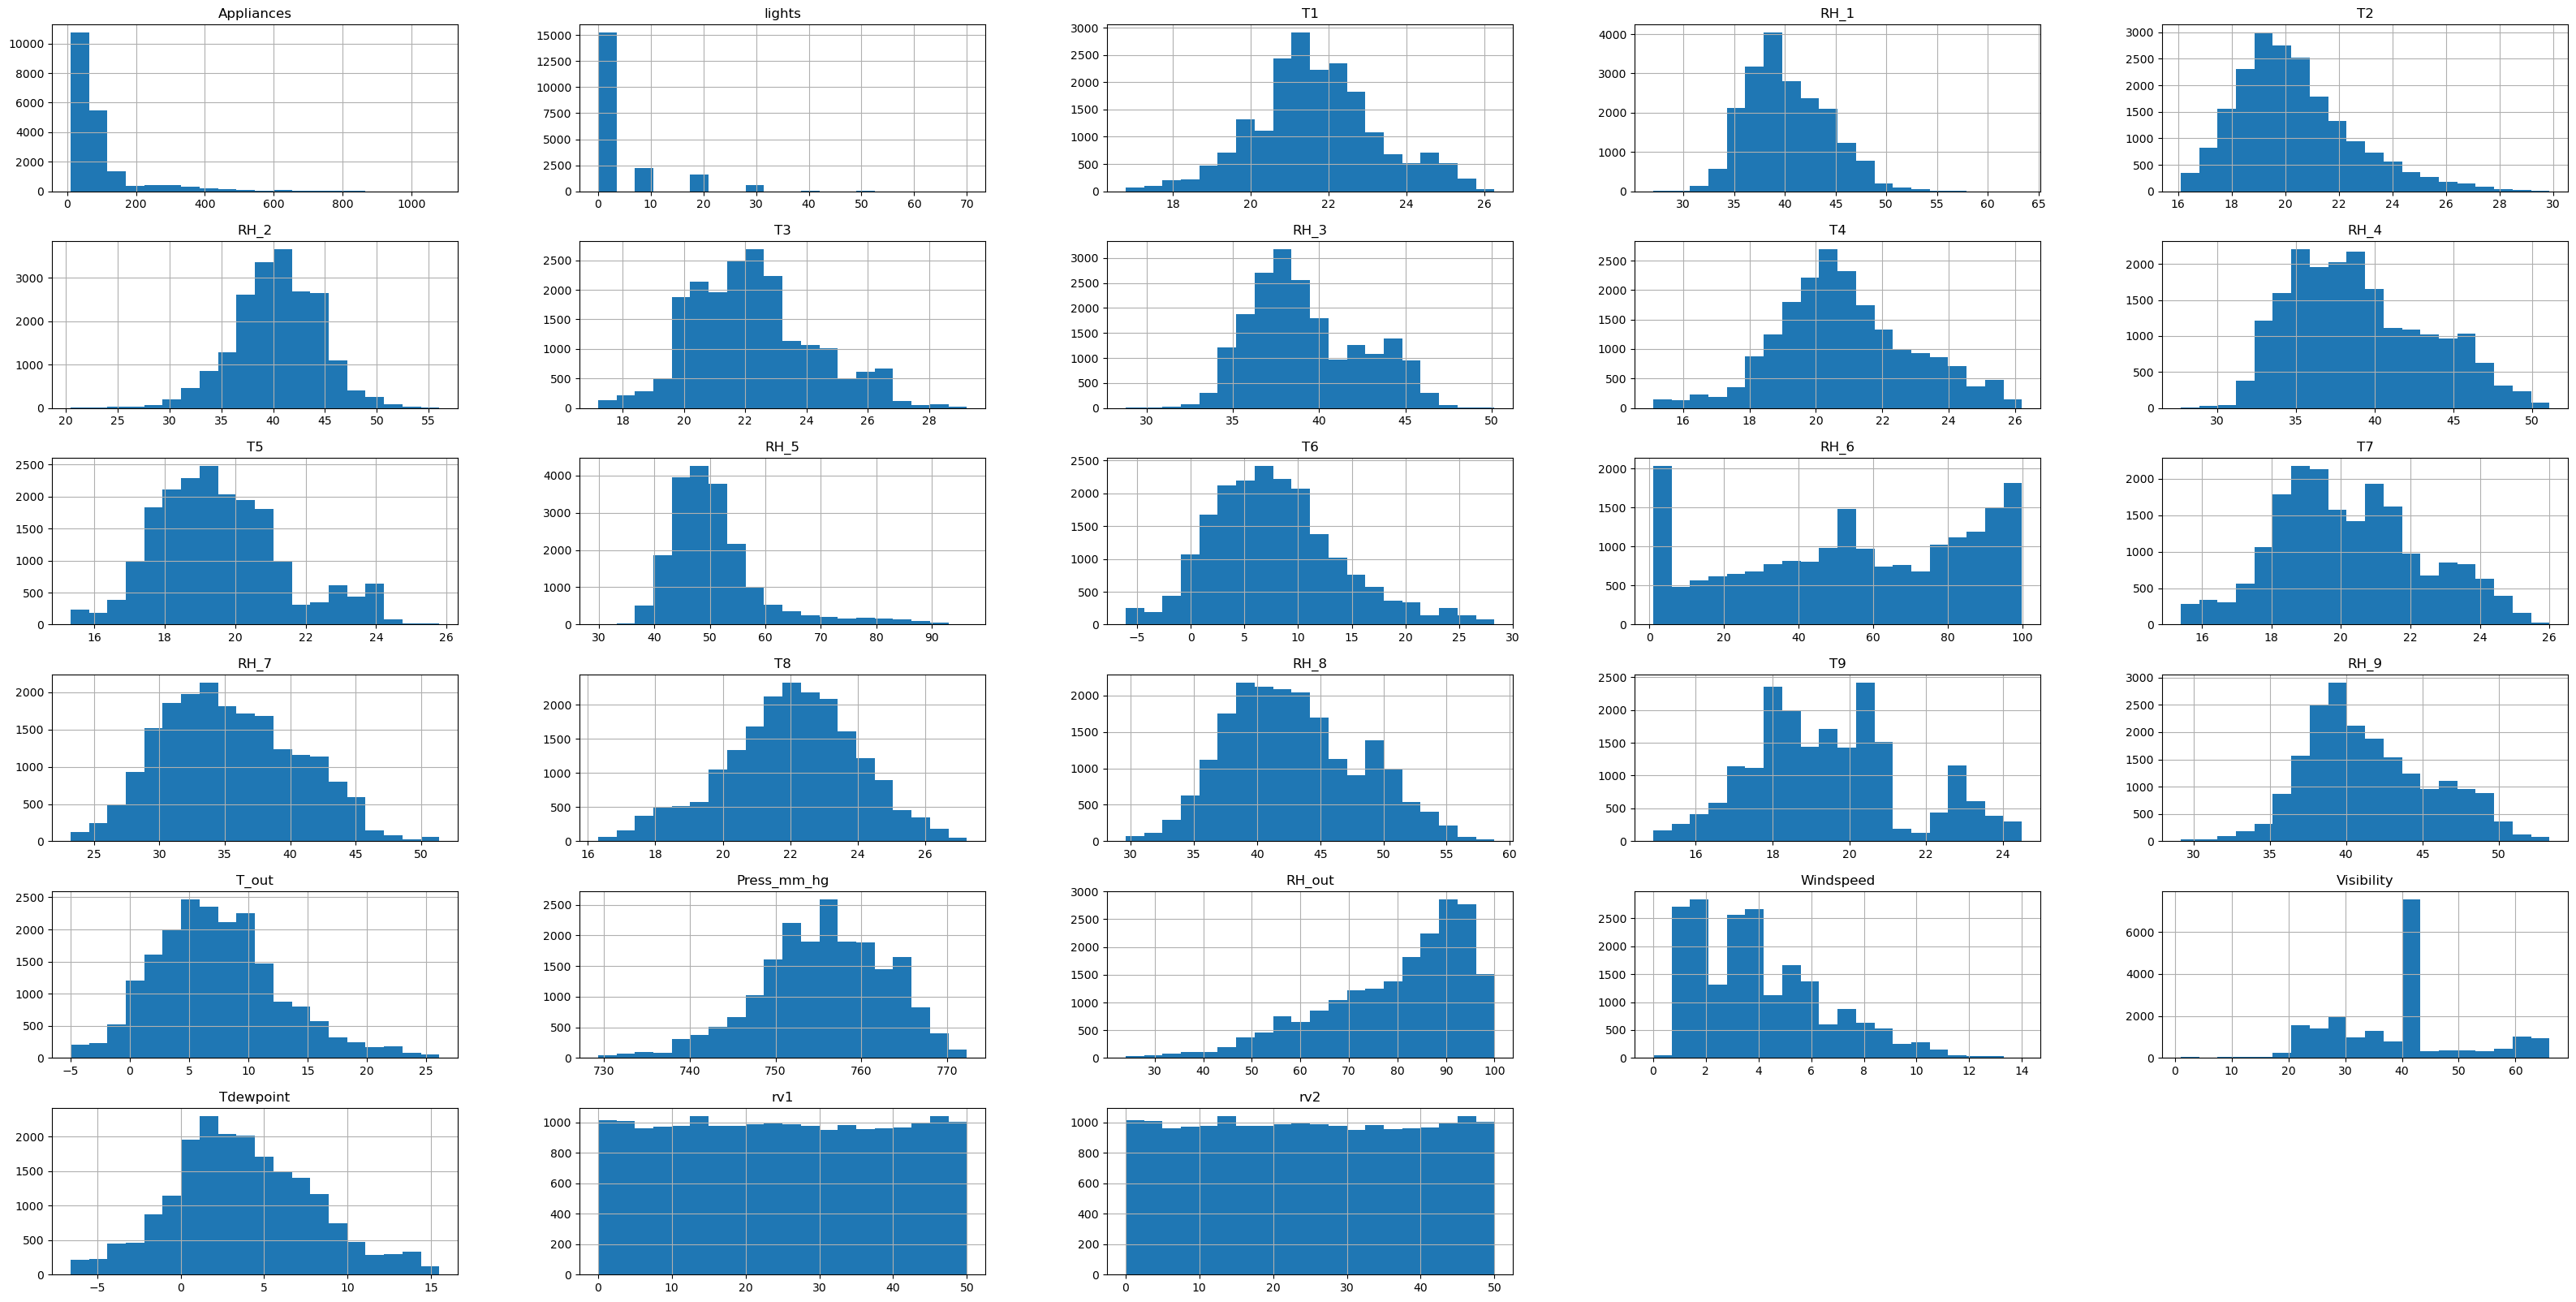

In [20]:
# Freq distribution of all data
data.hist(bins = 20 , figsize= (40,20));


In [21]:
total_energy_consumption_wh = data['Appliances'].sum()

print(f'Total Energy Consumption of All Appliances (Wh): {total_energy_consumption_wh}')
# Electricity rate in Belgium per kWh
electricity_rate_belgium = 0.41  # €0.41 per kWh

# Calculate total power consumption of all appliances in kWh
total_power_consumption_wh = data['Appliances'].sum()
total_power_consumption_kwh = (total_power_consumption_wh / 1000)

# Calculate the total cost for the total energy consumption
total_cost = total_power_consumption_kwh * electricity_rate_belgium

print(f'Total Power Consumption by Appliances (kWh): {total_power_consumption_kwh}')
print(f'Total Cost for Energy Consumption (€): {total_cost}')

Total Energy Consumption of All Appliances (Wh): 1928010
Total Power Consumption by Appliances (kWh): 1928.01
Total Cost for Energy Consumption (€): 790.4840999999999


In [22]:
# Feature column variables
feature_cols =  ['lights', 'T6', 'T9','rv1', 'rv2','RH_6', 'RH_out']

(0.0, 40.0)

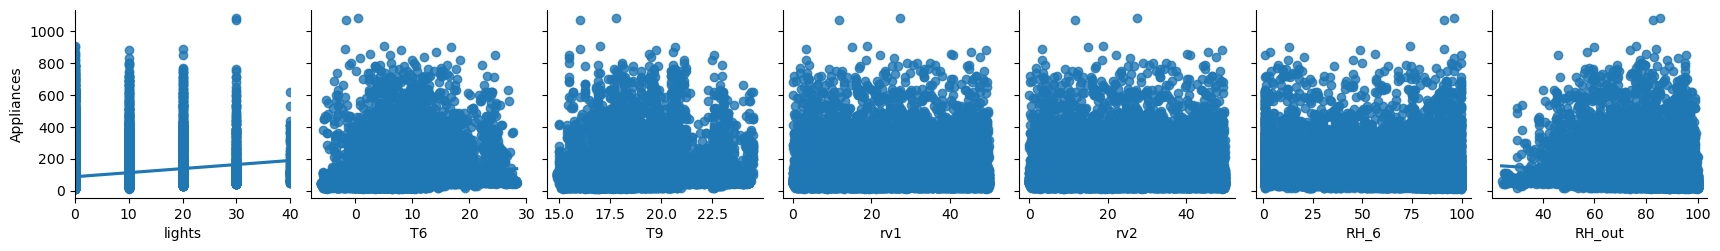

In [23]:
# Multiple scatterplots using Seaborn to visualize relationships between variables
d = sns.pairplot(data, x_vars=feature_cols, y_vars='Appliances', kind='reg', diag_kind=None, palette="light:#5A9")
d.axes[0, 0].set_xlim((0, 40))

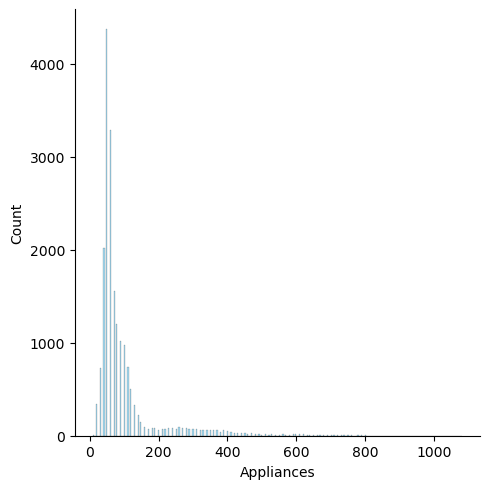

In [24]:
# Distribution of Appliances Data
sns.displot(data["Appliances"] ,color='skyblue')

In [25]:
# Checking Skewness of Appliances
intial_skew = data['Appliances'].skew()
print(f'Skewness for Appliances =',intial_skew)

Skewness for Appliances = 3.3863672147430632


Skewness for Appliances = 1.165816888806544


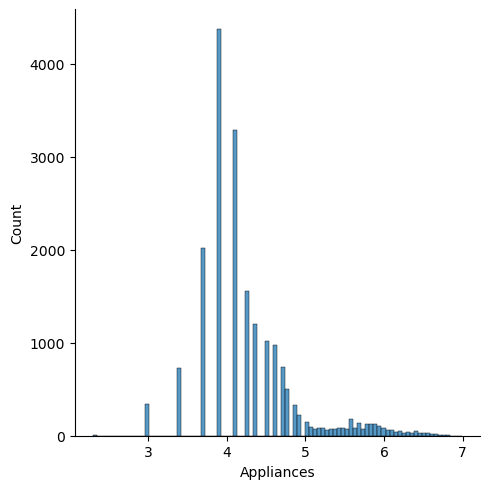

In [26]:
# Skewness after using  log-transformation on  Appliances data
appliances_log = np.log(data['Appliances'])
print(f'Skewness for Appliances =',appliances_log.skew())
sns.displot(appliances_log)

<Axes: >

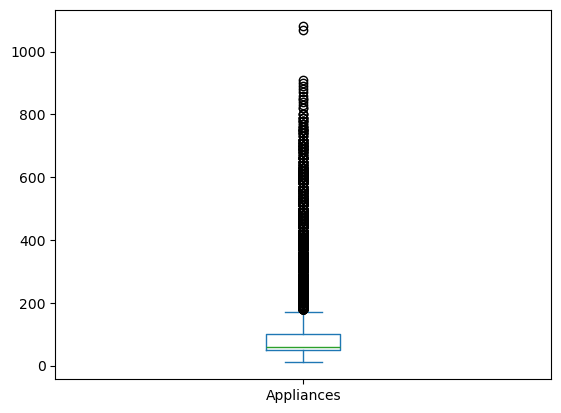

In [27]:
data['Appliances'].plot(kind='box')

In [28]:
percentage_less_than_200 = data['Appliances'][data['Appliances'] <= 200].count()/19735 *100

print(f"The percentage of values in the 'Appliances' column that are less than or equal to 200 Wh is: {percentage_less_than_200:.2f}%")

The percentage of values in the 'Appliances' column that are less than or equal to 200 Wh is: 90.29%


These results show that outliers are affecting our data and could harm our machine learning model in the next steps. Since they make up 9.71% of the data and will likely have a negative impact, we will remove these outliers.

In [30]:
# Assuming 'data' is your DataFrame
threshold = 200
filtered_data = data[data['Appliances'] <= threshold]['Appliances']
print(filtered_data)

0         60
1         60
2         50
3         50
4         60
        ... 
19727    120
19728    110
19729     90
19730    100
19731     90
Name: Appliances, Length: 17819, dtype: int64


In [31]:
# Data Wrangling
data["dates"] = pd.to_datetime(data['date'])
data['months'] = data["dates"].dt.month
data['hour'] = data["dates"].dt.hour
data['week_days']=data["dates"].dt.dayofweek

In [32]:
total_duration = data["dates"].max() - data["dates"].min()

# Display the count of the duration of the total data
print("Count of the duration of the total data:")
print(total_duration)

Count of the duration of the total data:
137 days 01:00:00


In [33]:
### - Relationship Between Energy Usage and Time of Day and Months

([<matplotlib.axis.XTick at 0x1cb6b50b410>,
 [Text(1, 0, '0'),
  Text(2, 0, '1'),
  Text(3, 0, '2'),
  Text(4, 0, '3'),
  Text(5, 0, '4'),
  Text(6, 0, '5'),
  Text(7, 0, '6'),
  Text(8, 0, '7'),
  Text(9, 0, '8'),
  Text(10, 0, '9'),
  Text(11, 0, '10'),
  Text(12, 0, '11'),
  Text(13, 0, '12'),
  Text(14, 0, '13'),
  Text(15, 0, '14'),
  Text(16, 0, '15'),
  Text(17, 0, '16'),
  Text(18, 0, '17'),
  Text(19, 0, '18'),
  Text(20, 0, '19'),
  Text(21, 0, '20'),
  Text(22, 0, '21'),
  Text(23, 0, '22'),
  Text(24, 0, '23')])

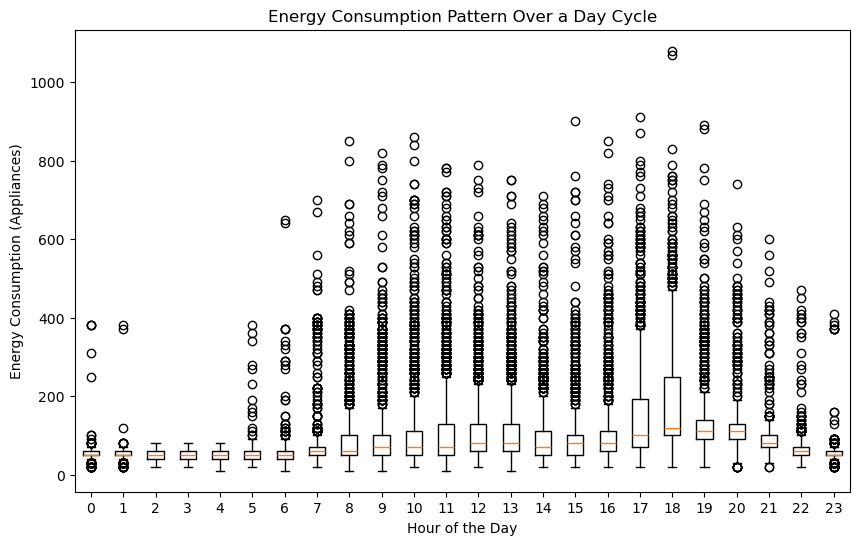

In [34]:
# Box plot for energy consumption over a day cycle for each hour
plt.figure(figsize=(10, 6))
plt.boxplot([data[data['hour'] == h]['Appliances'] for h in range(24)], showfliers=True)
plt.title('Energy Consumption Pattern Over a Day Cycle')
plt.xlabel('Hour of the Day')
plt.ylabel('Energy Consumption (Appliances)')
plt.xticks(range(1, 25), labels=range(24))


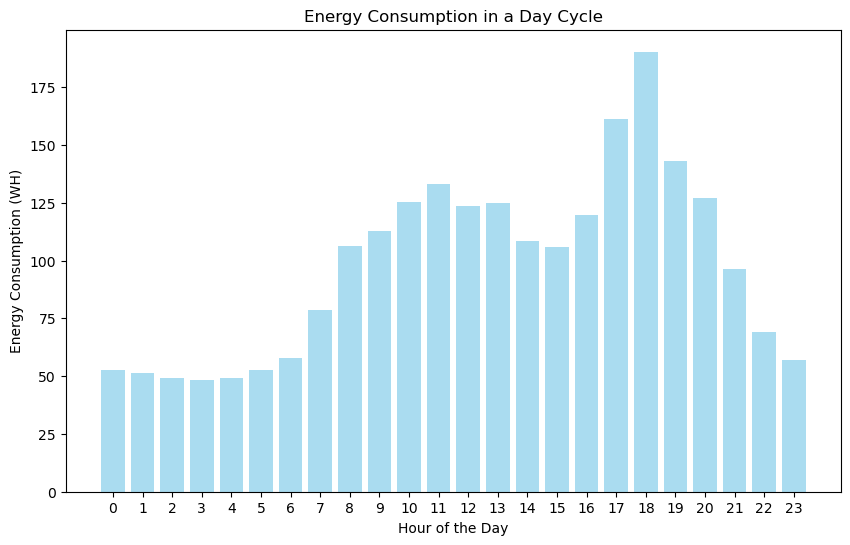

In [35]:
# Bar Chart for energy consumption over a day cycle for each hour
plt.figure(figsize=(10, 6))
for h in range(24):
    plt.bar(h, data[data['hour'] == h]['Appliances'].mean(), color='skyblue', alpha=0.7)
plt.title('Energy Consumption in a Day Cycle')
plt.xlabel('Hour of the Day')
plt.ylabel('Energy Consumption (WH)')
plt.xticks(range(24), labels=range(24))
plt.show()

Above chart show the average distribution of energy consumed throughout the day for 4.5 months. We can clearly see that there are two peaks one at 11:00 AM which is shallow and low and the other one at 06:00 PM in the evening which is sharper as well as higher.

During sleeping hours (10:00PM to 06:00AM) energy consumption is less about 50 Wh. After about 6 AM, energy consumption starts to rise gradually up until 11 AM (probably due to morning chores). And then gradually decreases to around 100 Wh at about 3 PM. After which the energy consumption drastically shoots up up until 6 PM in the evening (probably due to requirement lights in rooms). However energy consumption of appliances reverts back to 50 Wh, as night approaches and people in the house go to bed at around 10 PM

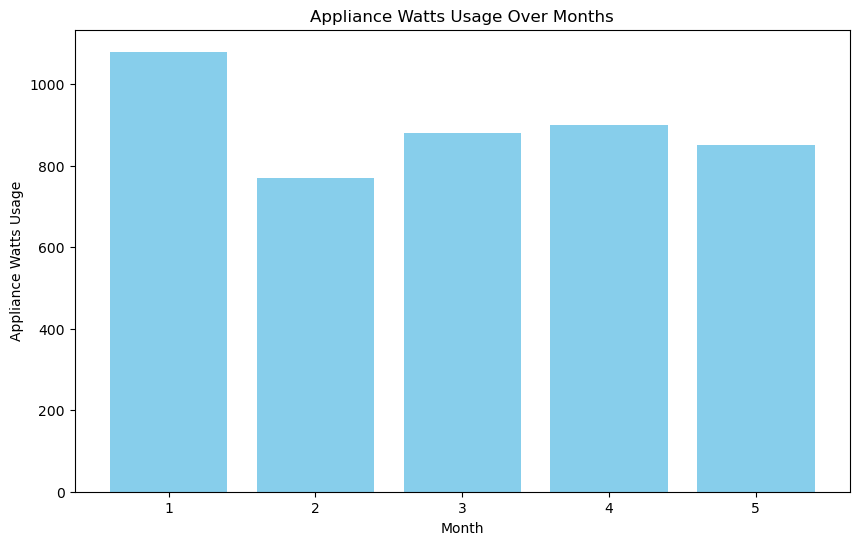

In [37]:
# Bar plot for Appliance Watts Usage over months

plt.figure(figsize=(10, 6))
plt.bar(data['months'], data['Appliances'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Appliance Watts Usage')
plt.title('Appliance Watts Usage Over Months')

# Export data to Excel
data.to_excel('appliance_data.xlsx', index=False)

In [38]:
#Sum of 'Appliances' for each month
date=data.groupby(data.months)["Appliances"].sum().sort_values(ascending=False)
date

months
3    432800
4    427200
2    421550
5    362950
1    283510
Name: Appliances, dtype: int64

Text(0.5, 1.0, 'Correlation Heatmap')

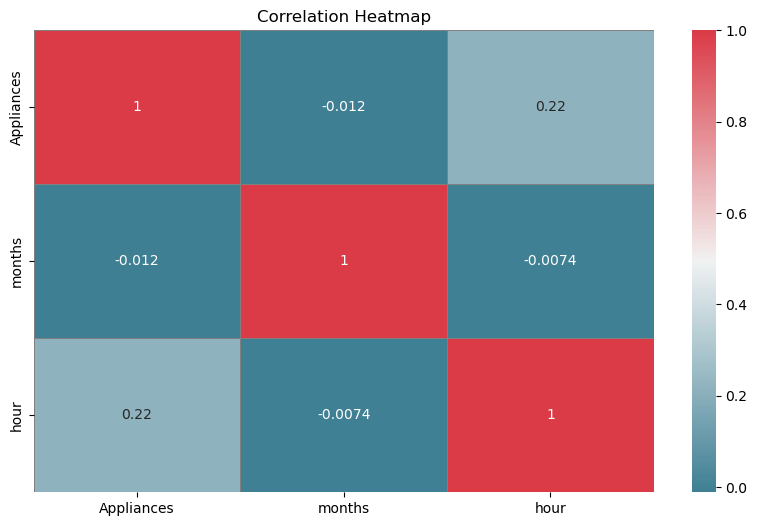

In [39]:
# Correlation Matrix
correlations=data[['Appliances', 'months', 'hour']].corr()
blue_cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(correlations, cmap=blue_cmap, linecolor='gray', linewidths=0.5, annot=True)
plt.title('Correlation Heatmap')

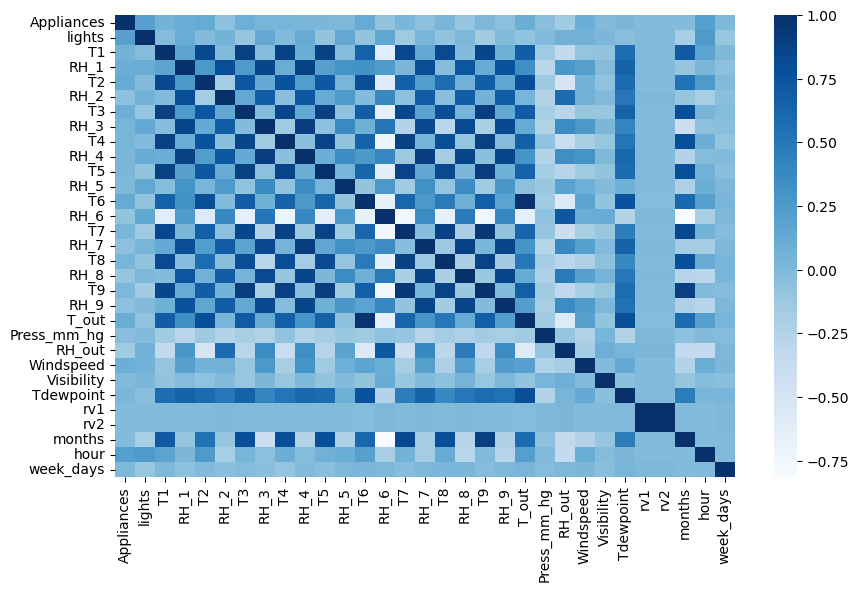

In [40]:
# Seaborn heatmap for numeric column correlations
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only = True),cmap="Blues");

<Axes: >

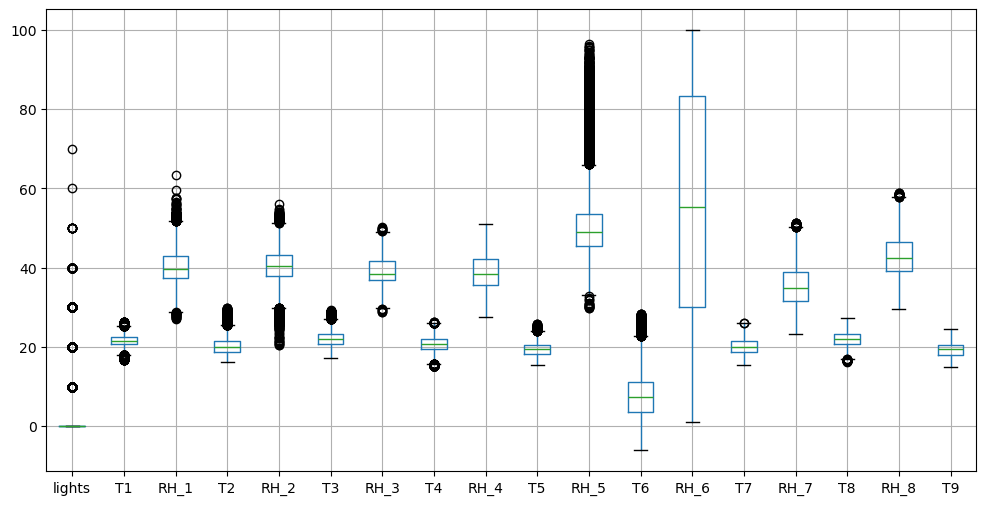

In [41]:
# Box plot for columns 2 to 19
plt.figure(figsize=(12,6))
data.iloc[:,2:20].boxplot()

---


## <font style='color:skyblue'>  4. Feature Selection <a id='section-7'></a>



In [44]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,dates,months,hour,week_days
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,92.0,7.000000,63.000000,5.3,13.275433,13.275433,2016-01-11 17:00:00,1,17,0
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,92.0,6.666667,59.166667,5.2,18.606195,18.606195,2016-01-11 17:10:00,1,17,0
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,92.0,6.333333,55.333333,5.1,28.642668,28.642668,2016-01-11 17:20:00,1,17,0
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,92.0,6.000000,51.500000,5.0,45.410389,45.410389,2016-01-11 17:30:00,1,17,0
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,92.0,5.666667,47.666667,4.9,10.084097,10.084097,2016-01-11 17:40:00,1,17,0


In [45]:
data.drop(["date","dates","lights"],axis=1,inplace=True)

In [46]:
#  F-scores of each feature using f_regression
X=data.iloc[:,1:]
Y=data.iloc[:,0]
f_scores = f_regression(X, Y)
f_scores

(array([6.08546649e+01, 1.47140998e+02, 2.88664211e+02, 7.24083194e+01,
        1.43812455e+02, 2.60243942e+01, 3.20699643e+01, 5.68130299e+00,
        7.70780063e+00, 9.54444046e-01, 2.76909655e+02, 1.37474160e+02,
        1.31448883e+01, 6.12846635e+01, 3.09491920e+01, 1.76061071e+02,
        1.97755919e+00, 5.23984346e+01, 1.95934202e+02, 2.40433596e+01,
        4.68470558e+02, 1.50924181e+02, 1.04712660e-03, 4.65245939e+00,
        2.45132436e+00, 2.45132436e+00, 2.65830480e+00, 9.73160402e+02,
        1.84831825e-01]),
 array([6.44916930e-015, 9.63943146e-034, 2.78494653e-064, 1.87302217e-017,
        5.08641648e-033, 3.40254021e-007, 1.50788109e-008, 1.71560296e-002,
        5.50345129e-003, 3.28602654e-001, 9.33386716e-062, 1.20948068e-031,
        2.89030224e-004, 5.18729570e-015, 2.68310259e-008, 5.21156624e-040,
        1.59663524e-001, 4.69710927e-013, 2.62485380e-044, 9.49392222e-007,
        1.07751629e-102, 1.45647106e-034, 9.74185818e-001, 3.10211263e-002,
        1.1744

Text(0.5, 1.0, 'P-value scores for numerical features')

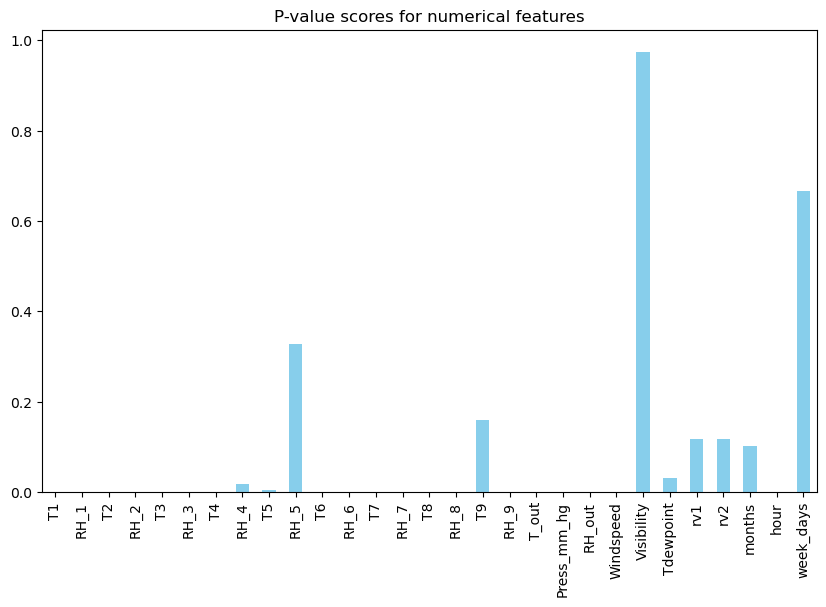

In [47]:
# Plot the p-values as a bar chart
p_values= pd.Series(f_scores[1],index= X.columns)
p_values.plot(kind='bar',color='skyblue',figsize=(10,6))
plt.title('P-value scores for numerical features')

#### <font style='color:skyblue'> High p-values:

The following columns have been identified with high p-values and are recommended for removal from the dataset:

- T9
- RH_4
- RH_5
- months
- Tdewpoint
- Visibility
- rv1
- rv2
- week_dayset variable 

In [49]:
# Dropping columns with high p-values from the dataset
data.drop(['T9', 'T6', 'RH_4', 'RH_5', 'months', 'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'week_days'], axis=1, inplace=True)

In [50]:
corr_tran=data.corr()
corr_appliances = corr_tran[['Appliances']]
corr_appliances

,Appliances
Appliances,1.000000
T1,0.055447
RH_1,0.086031
T2,0.120073
RH_2,-0.060465
T3,0.085060
RH_3,0.036292
T4,0.040281
T5,0.019760
RH_6,-0.083178


---


## <font style='color:skyblue'> 5. Feature Engineering <a id='section-8'></a>



In [53]:
 #Removing outliers 
for i  in data.columns:
  if(i=='Appliances'):
   Q1 = data[i].quantile(0.25)
   Q3 = data[i].quantile(0.75)
   IQR = Q3 - Q1

   data=data[(data[i]<(Q3 + 1.5 * IQR))]
datadf=data[(data[i]>(Q1 - 1.5 * IQR))] 

In [54]:
# Create feature column variables
feature_eng = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'T5',
       'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'RH_9', 'T_out', 'Press_mm_hg',
       'RH_out', 'Windspeed', 'hour']

In [55]:
# Create X and y.
X = data[feature_eng]
y = data.Appliances

# Instantiate and fit.
linreg = LinearRegression()
linreg.fit(X, y)

# Print the coefficients.
print(linreg.intercept_) 
print(linreg.coef_) 

36.26955232615525
[ 4.23892423  5.40307645 -3.3110703  -3.06065183  0.49954437 -0.56498345
 -0.41055767  0.01922706  0.01094481 -6.36662159  0.83098148  7.51233058
 -1.93599589 -1.10812058  0.17191763 -0.01881842 -0.03437429  0.76058422
  0.70077165]


In [56]:
# Pair the feature names with the coefficients.
list(zip(feature_eng, linreg.coef_))

[('T1', 4.238924232369781),
 ('RH_1', 5.40307645444844),
 ('T2', -3.311070301053367),
 ('RH_2', -3.0606518287696067),
 ('T3', 0.49954436807756264),
 ('RH_3', -0.5649834464769782),
 ('T4', -0.41055767390015957),
 ('T5', 0.019227055359392453),
 ('RH_6', 0.010944809068165631),
 ('T7', -6.36662158529466),
 ('RH_7', 0.830981480528867),
 ('T8', 7.512330583717658),
 ('RH_8', -1.9359958908050436),
 ('RH_9', -1.1081205836968195),
 ('T_out', 0.1719176294923215),
 ('Press_mm_hg', -0.0188184165170607),
 ('RH_out', -0.034374285868816454),
 ('Windspeed', 0.7605842199307973),
 ('hour', 0.700771649868434)]

#### <font style='color:skyblue'>  Interpreting the coefficients:
  
- Increase Effect: RH_1, T3, T8, T_out, Press_mm_hg, Windspeed, and hour have a positive impact on the target variable, meaning that an increase in these features leads to an increase in the target variable.- 
Decrease Effect: T1, T2, RH_2, T4, T5, T7, RH_3, RH_6, RH_7, RH_8, RH_9, and RH_out have a negative impact on the target variable, indicating that an increase in these features results in a decrease in the target variable.


In [58]:
# Model Evaluation: Mean Absolute Error, Mean Squared Error, Root Mean Squared Error

X_train, X_test, y_train, y_test = train_test_split(data[feature_eng], data['Appliances'], random_state=123, test_size=0.25)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 17.556543826635796
Mean Squared Error: 572.1222763994513
Root Mean Squared Error: 23.919077666152834


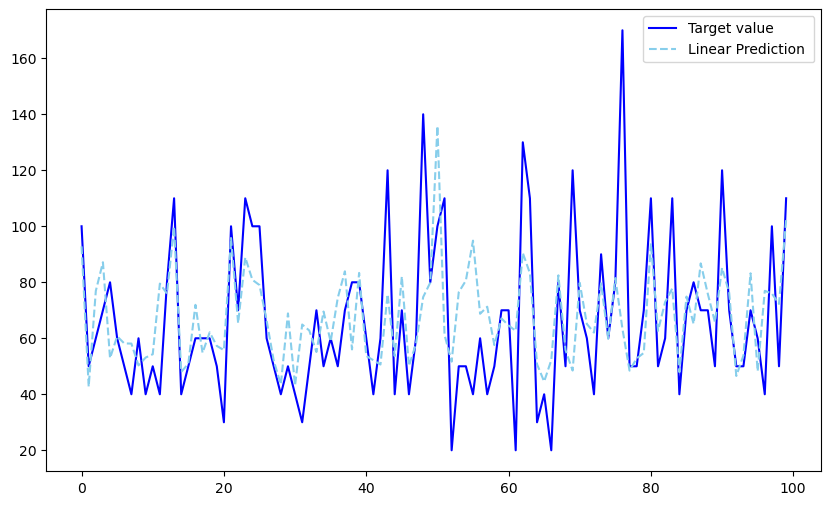

In [59]:
# Exploring Linear Regression: Target Values vs. Predictions
fig = plt.figure(figsize=(10,6))
plt.plot(y_test[:100].values,label='Target value',color='b')
plt.plot(y_pred[:100],label='Linear Prediction ', linestyle='--', color='skyblue')
plt.legend(loc=1)
plt.savefig('plot.png')

#### <font style='color:skyblue'>  Final Feature Chosen

In [61]:
final_feature = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T5', 'RH_6', 'T7', 'T8', 'RH_8', 'Press_mm_hg', 'Windspeed', 'hour']

In [62]:
# Create X and y.
X = data[final_feature]
y = data.Appliances

# Instantiate and fit.
linreg = LinearRegression()
linreg.fit(X, y)

# Print the coefficients.
print(linreg.intercept_) 
print(linreg.coef_)

69.50182032523156
[ 4.12693806  5.39412325 -2.93872115 -2.97516166  0.03592132 -0.87874793
  0.18351727 -0.019328   -6.23066701  7.08363875 -1.77584617 -0.08314611
  0.75621131  0.81977823]


In [63]:
X_train, X_test, y_train, y_test = train_test_split(data[final_feature], data['Appliances'], random_state=123, test_size=0.25)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Absolute Error: 17.65164466315803
Mean Squared Error: 575.6511601813243
Root Mean Squared Error: 23.992731403100485


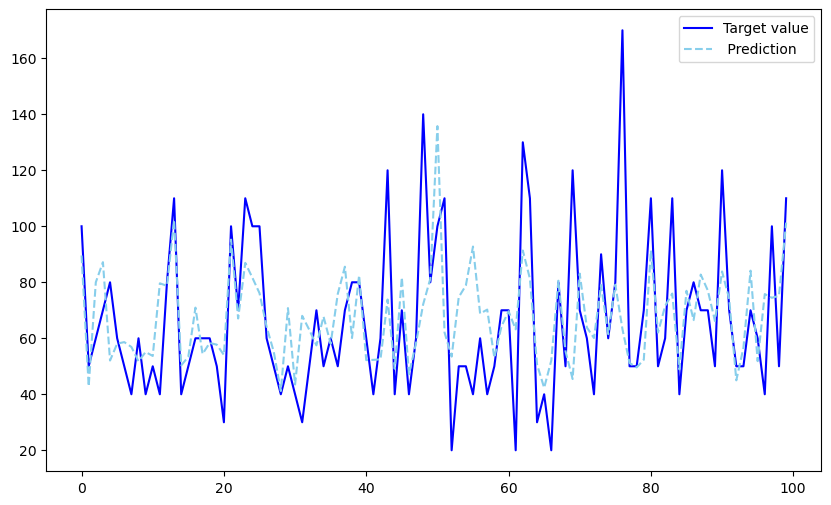

In [64]:
fig = plt.figure(figsize=(10,6))
plt.plot(y_test[:100].values,label='Target value',color='b')
plt.plot(y_pred[:100],label=' Prediction ', linestyle='--', color='skyblue')
plt.legend(loc=1)
plt.savefig('plot.png')